In [1]:
# establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

#fetch the top 10 cryptos by market cap
#fetch the top 10 cryptos by volume in last 24 hours

#fetch  historical crypto prices for BTC and Ethereum
# get live crypto prices for the top 5 crypto currencies

#calculate teh volume, volatility, market cap of various coins and pick the top 5 + 5 other outliers above a certain market cap
# fetch last 3 months historic data for ehteremum 
# charts for the above

# run a simple moving average trading algo on ethereum on last 3 months data
#calcualte the returns of the above strategy
#compare it with overall returns that ETH would have given anyways 


# these are for later 
# repeat the above for 5 years of daily data 
# repeat the above for BTC
# moudlarise the above and run on 3 more currencies: possibly MATIC, RIPPLE, Algorand, etc. 

# for much later
# visualise the strategy on a chart 

CoinGecko API docs are here https://www.coingecko.com/en/api/documentation

- Connect to pycoingecko, pandas and other libs needed
- I have created a vritual environment for this project
- I have also played around in postman in the coingecko collection to see how the API behaves
- I have notes on pandas in the notebook as well as in onenote under cryptotrading project under python and data analysis- so be sure to check both the notes and links directly in the notebook as well as teh one note notes to quickly review pandas, and many other learnings 

In [2]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
from pycoingecko import CoinGeckoAPI # API docs are here: https://www.coingecko.com/en/api/documentation 
cg = CoinGeckoAPI()

### Establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

In [4]:
cg.get_price(ids=['bitcoin','ethereum'], vs_currencies='usd')

{'bitcoin': {'usd': 27075}, 'ethereum': {'usd': 1893.96}}

### Fetch the top 10 cryptos by market cap

In [5]:
cg.get_coins_markets(vs_currency='usd') # get market data in USD 

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 27076,
  'market_cap': 525039462127,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 568601454606,
  'total_volume': 9359421555,
  'high_24h': 27208,
  'low_24h': 26716,
  'price_change_24h': 98.21,
  'price_change_percentage_24h': 0.36406,
  'market_cap_change_24h': 2329747245,
  'market_cap_change_percentage_24h': 0.44571,
  'circulating_supply': 19391137.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -60.78953,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 39825.05362,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-06-02T18:06:12.596Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1595348880',
  

In [6]:
current_market_data = pd.DataFrame(cg.get_coins_markets(vs_currency='usd')) # get the json into a pd dataframe

In [8]:
# explore the data frame
current_market_data.shape

(100, 26)

In [7]:
current_market_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,bitcoin,ethereum,tether,binancecoin,usd-coin,ripple,staked-ether,cardano,dogecoin,solana
symbol,btc,eth,usdt,bnb,usdc,xrp,steth,ada,doge,sol
name,Bitcoin,Ethereum,Tether,BNB,USD Coin,XRP,Lido Staked Ether,Cardano,Dogecoin,Solana
image,https://assets.coingecko.com/coins/images/1/la...,https://assets.coingecko.com/coins/images/279/...,https://assets.coingecko.com/coins/images/325/...,https://assets.coingecko.com/coins/images/825/...,https://assets.coingecko.com/coins/images/6319...,https://assets.coingecko.com/coins/images/44/l...,https://assets.coingecko.com/coins/images/1344...,https://assets.coingecko.com/coins/images/975/...,https://assets.coingecko.com/coins/images/5/la...,https://assets.coingecko.com/coins/images/4128...
current_price,27076.0,1894.15,1.001,306.94,1.0,0.519392,1893.08,0.376021,0.072257,21.13
market_cap,525039462127,227723368637,83247767645,48442176682,28952739679,27006221369,13323433456,13172540642,10081000951,8382384805
market_cap_rank,1,2,3,4,5,6,7,8,9,10
fully_diluted_valuation,568601454606.0,227723368637.0,83247767645.0,61363377086.0,28953059704.0,51951639640.0,13323433456.0,16914366574.0,10080985065.0,11597152784.0
total_volume,9359421555.0,6801680998.0,11994392641.0,335198624.0,3177150384.0,1080975872.0,12058847.0,220599131.0,202692894.0,248554123.0
high_24h,27208.0,1898.51,1.005,308.43,1.002,0.520746,1898.12,0.378009,0.072372,21.29


In [12]:
#columns we are interested in 
#"symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"
## what is volume? how to read candlestick chart? what are top indicatros that traders use to predict direction/momentum?

In [13]:
current_market_data.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [14]:
current_market_data.dtypes

id                                   object
symbol                               object
name                                 object
image                                object
current_price                       float64
market_cap                            int64
market_cap_rank                       int64
fully_diluted_valuation             float64
total_volume                        float64
high_24h                            float64
low_24h                             float64
price_change_24h                    float64
price_change_percentage_24h         float64
market_cap_change_24h               float64
market_cap_change_percentage_24h    float64
circulating_supply                  float64
total_supply                        float64
max_supply                          float64
ath                                 float64
ath_change_percentage               float64
ath_date                             object
atl                                 float64
atl_change_percentage           

In [15]:
current_market_data.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,1.000000e+02,1.000000e+02,100.000000,7.800000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000,1.000000e+02,9.400000e+01,5.800000e+01,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,6.788649e+02,1.128186e+10,50.500000,1.641925e+10,3.944020e+08,6.815616e+02,6.693732e+02,3.220263e+00,0.938849,8.157942e+07,1.046698,1.987447e+13,2.595163e+13,2.469304e+13,1791.245719,-73.025331,8.928928e+01,1.741575e+05
std,3.824217e+03,5.744014e+10,29.011492,6.935975e+10,1.667734e+09,3.837416e+03,3.771384e+03,1.800227e+01,2.119757,3.604106e+08,2.122777,1.185100e+14,1.500623e+14,1.403102e+14,9837.269947,26.841023,3.952594e+02,1.512896e+06
min,5.835960e-07,3.918253e+08,1.000000,4.413831e+08,1.317400e+02,5.876220e-07,5.766080e-07,-2.068084e+01,-4.357180,-8.696774e+07,-3.612040,1.563486e+05,1.563486e+05,1.563486e+05,0.000003,-99.999930,5.636600e-11,1.266950e+00
25%,4.796415e-01,6.006725e+08,25.750000,8.680143e+08,1.111684e+07,4.846400e-01,4.677338e-01,-1.797900e-08,-0.063613,-1.700757e+05,-0.000582,1.109544e+08,1.477252e+08,2.009951e+08,1.760000,-92.275735,2.733647e-02,8.383768e+01
50%,1.157500e+00,9.385720e+08,50.500000,1.736652e+09,3.189913e+07,1.165000e+00,1.102000e+00,4.788250e-03,0.528195,6.825212e+06,0.584885,8.493496e+08,1.010347e+09,1.002071e+09,9.320000,-85.231800,3.901070e-01,3.903432e+02
75%,1.156000e+01,2.580365e+09,75.250000,6.907925e+09,1.048377e+08,1.160750e+01,1.124000e+01,1.221285e-01,1.569227,2.724078e+07,1.758475,3.471305e+09,9.429902e+09,9.429902e+09,125.625000,-61.172097,1.036750e+00,4.450690e+03
max,2.715900e+04,5.250395e+11,100.000000,5.686015e+11,1.199439e+10,2.721300e+04,2.676900e+04,1.423600e+02,9.952770,2.687842e+09,10.046680,9.514217e+14,9.999894e+14,9.900000e+14,70643.000000,-4.233900,3.139170e+03,1.511672e+07


In [16]:
current_market_data.sort_values(by="market_cap", ascending=False)[0:10] # grab the top 10 cyptos by market cap

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,27076.000000,525039462127,1,5.686015e+11,9.359422e+09,27208.000000,...,2.100000e+07,2.100000e+07,69045.000000,-60.78953,2021-11-10T14:24:11.849Z,67.810000,39825.05362,2013-07-06T00:00:00.000Z,None,2023-06-02T18:06:12.596Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1894.150000,227723368637,2,2.277234e+11,6.801681e+09,1898.510000,...,1.202428e+08,NaN,4878.260000,-61.19423,2021-11-10T14:24:19.604Z,0.432979,437114.50066,2015-10-20T00:00:00.000Z,"{'times': 92.53594606609569, 'currency': 'btc'...",2023-06-02T18:06:14.490Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.001000,83247767645,3,8.324777e+10,1.199439e+10,1.005000,...,8.324969e+10,NaN,1.320000,-24.42140,2018-07-24T00:00:00.000Z,0.572521,74.66205,2015-03-02T00:00:00.000Z,None,2023-06-02T18:05:00.640Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,306.940000,48442176682,4,6.136338e+10,3.351986e+08,308.430000,...,1.579002e+08,2.000000e+08,686.310000,-55.30156,2021-05-10T07:24:17.097Z,0.039818,770332.22991,2017-10-19T00:00:00.000Z,None,2023-06-02T18:06:12.187Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.000000,28952739679,5,2.895306e+10,3.177150e+09,1.002000,...,2.894634e+10,NaN,1.170000,-14.71484,2019-05-08T00:40:28.300Z,0.877647,13.95752,2023-03-11T08:02:13.981Z,None,2023-06-02T18:06:19.952Z
5,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.519392,27006221369,6,5.195164e+10,1.080976e+09,0.520746,...,9.998892e+10,1.000000e+11,3.400000,-84.71321,2018-01-07T00:00:00.000Z,0.002686,19240.05226,2014-05-22T00:00:00.000Z,None,2023-06-02T18:06:12.251Z
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1893.080000,13323433456,7,1.332343e+10,1.205885e+07,1898.120000,...,7.036886e+06,7.036886e+06,4829.570000,-60.82090,2021-11-10T14:40:47.256Z,482.900000,291.84038,2020-12-22T04:08:21.854Z,None,2023-06-02T18:06:13.543Z
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.376021,13172540642,8,1.691437e+10,2.205991e+08,0.378009,...,4.500000e+10,4.500000e+10,3.090000,-87.82610,2021-09-02T06:00:10.474Z,0.019253,1851.91599,2020-03-13T02:22:55.044Z,None,2023-06-02T18:06:14.267Z
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.072257,10081000951,9,1.008099e+10,2.026929e+08,0.072372,...,1.396029e+11,NaN,0.731578,-90.13220,2021-05-08T05:08:23.458Z,0.000087,82969.66026,2015-05-06T00:00:00.000Z,None,2023-06-02T18:06:19.210Z
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,21.130000,8382384805,10,1.159715e+10,2.485541e+08,21.290000,...,5.490267e+08,NaN,259.960000,-91.87482,2021-11-06T21:54:35.825Z,0.500801,4117.67362,2020-05-11T19:35:23.449Z,None,2023-06-02T18:06:17.404Z


In [17]:
top_crypto_mcap = current_market_data.sort_values(by="market_cap", ascending=False).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]] # grab the top 5 cyptos by market cap
top_crypto_mcap # TOP 10 CRYTPOS BY MARKET CAP

,symbol,name,current_price,market_cap,total_volume,ath,ath_change_percentage
0,btc,Bitcoin,27076.000000,525039462127,9.359422e+09,69045.000000,-60.78953
1,eth,Ethereum,1894.150000,227723368637,6.801681e+09,4878.260000,-61.19423
2,usdt,Tether,1.001000,83247767645,1.199439e+10,1.320000,-24.42140
3,bnb,BNB,306.940000,48442176682,3.351986e+08,686.310000,-55.30156
4,usdc,USD Coin,1.000000,28952739679,3.177150e+09,1.170000,-14.71484
5,xrp,XRP,0.519392,27006221369,1.080976e+09,3.400000,-84.71321
6,steth,Lido Staked Ether,1893.080000,13323433456,1.205885e+07,4829.570000,-60.82090
7,ada,Cardano,0.376021,13172540642,2.205991e+08,3.090000,-87.82610
8,doge,Dogecoin,0.072257,10081000951,2.026929e+08,0.731578,-90.13220
9,sol,Solana,21.130000,8382384805,2.485541e+08,259.960000,-91.87482


### Fetch the top 10 cryptos by volume traded last 24 hours 

In [18]:
top_crypto_vol = current_market_data.sort_values(by="total_volume", ascending=False).reset_index(drop=True).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]]


In [19]:
top_crypto_vol  # TOP CRYPTOS BY VOL TRADED IN LAST 24 HOURS 

,symbol,name,current_price,market_cap,total_volume,ath,ath_change_percentage
0,usdt,Tether,1.001000,83247767645,1.199439e+10,1.320000,-24.42140
1,btc,Bitcoin,27076.000000,525039462127,9.359422e+09,69045.000000,-60.78953
2,eth,Ethereum,1894.150000,227723368637,6.801681e+09,4878.260000,-61.19423
3,usdc,USD Coin,1.000000,28952739679,3.177150e+09,1.170000,-14.71484
4,xrp,XRP,0.519392,27006221369,1.080976e+09,3.400000,-84.71321
5,busd,Binance USD,1.000000,5155276004,8.334988e+08,1.150000,-13.33988
6,ltc,Litecoin,94.150000,6878361650,6.256615e+08,410.260000,-77.04827
7,bnb,BNB,306.940000,48442176682,3.351986e+08,686.310000,-55.30156
8,arb,Arbitrum,1.240000,1577356523,2.960671e+08,8.670000,-85.75039
9,trx,TRON,0.076629,6910017279,2.861904e+08,0.231673,-66.94263


### Fetch  historical crypto prices for BTC and Ethereum


In [20]:
# GETTING BTC HISToRIcAL PRICES

In [21]:
btc_historical_prices_json= cg.get_coin_market_chart_by_id(id="bitcoin", vs_currency="usd",days="3500", interval="daily")

In [23]:
btc_historical_prices_json

{'prices': [[1383350400000, 206.89],
  [1383436800000, 212.45],
  [1383523200000, 226.28],
  [1383609600000, 230.63],
  [1383696000000, 260.85],
  [1383782400000, 295.63],
  [1383868800000, 332.02],
  [1383955200000, 358.0],
  [1384041600000, 313.0],
  [1384128000000, 340.55],
  [1384214400000, 355.48],
  [1384300800000, 404.17],
  [1384387200000, 408.84],
  [1384473600000, 424.16],
  [1384560000000, 437.41],
  [1384646400000, 488.36],
  [1384732800000, 580.87],
  [1384819200000, 614.4],
  [1384905600000, 565.34],
  [1384992000000, 675.06],
  [1385078400000, 731.15],
  [1385164800000, 819.31],
  [1385251200000, 764.43],
  [1385337600000, 793.07],
  [1385424000000, 832.93],
  [1385510400000, 914.13],
  [1385596800000, 979.08],
  [1385683200000, 1101.83],
  [1385769600000, 1127.45],
  [1385856000000, 1033.39],
  [1385942400000, 974.03],
  [1386028800000, 1078.64],
  [1386115200000, 1121.48],
  [1386201600000, 989.04],
  [1386288000000, 1019.66],
  [1386374400000, 811.98],
  [138646080000

In [24]:
# experimenting to solve my datetime problem here temporarily3
#import datetime
#timestamp = datetime.datetime.fromtimestamp(1383436800)
#print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

In [25]:
btc_historical_prices=pd.DataFrame(btc_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(btc_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(btc_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [26]:
btc_historical_prices.dtypes

date            int64
price         float64
market_cap    float64
volume        float64
dtype: object

In [27]:
btc_historical_prices['coin']=["btc"]*len(btc_historical_prices.index)

In [28]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,1383350400000,206.890000,2.470106e+09,0.000000e+00,btc
1,1383436800000,212.450000,2.537556e+09,0.000000e+00,btc
2,1383523200000,226.280000,2.703825e+09,0.000000e+00,btc
3,1383609600000,230.630000,2.756790e+09,0.000000e+00,btc
4,1383696000000,260.850000,3.119094e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,1685404800000,27759.746664,5.384310e+11,1.348321e+10,btc
3496,1685491200000,27713.908548,5.374141e+11,1.276644e+10,btc
3497,1685577600000,27245.474465,5.284644e+11,1.000111e+10,btc
3498,1685664000000,26824.101500,5.202719e+11,1.215609e+10,btc


In [30]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,1383350400,206.890000,2.470106e+09,0.000000e+00,btc
1,1383436800,212.450000,2.537556e+09,0.000000e+00,btc
2,1383523200,226.280000,2.703825e+09,0.000000e+00,btc
3,1383609600,230.630000,2.756790e+09,0.000000e+00,btc
4,1383696000,260.850000,3.119094e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,1685404800,27759.746664,5.384310e+11,1.348321e+10,btc
3496,1685491200,27713.908548,5.374141e+11,1.276644e+10,btc
3497,1685577600,27245.474465,5.284644e+11,1.000111e+10,btc
3498,1685664000,26824.101500,5.202719e+11,1.215609e+10,btc


In [31]:
eth_historical_prices_json= cg.get_coin_market_chart_by_id(id="ethereum", vs_currency="usd",days="3500", interval="daily")

In [32]:
eth_historical_prices_json

{'prices': [[1438905600000, 2.83162],
  [1438992000000, 1.33075],
  [1439164800000, 0.6875857090838133],
  [1439251200000, 1.067378879429946],
  [1439337600000, 1.256613175101658],
  [1439424000000, 1.825395446319752],
  [1439510400000, 1.825974891355639],
  [1439596800000, 1.670949668937766],
  [1439683200000, 1.476607254205028],
  [1439769600000, 1.20387143115441],
  [1439856000000, 1.281393051659975],
  [1439942400000, 1.252738651679077],
  [1440028800000, 1.484195074171873],
  [1440115200000, 1.40631477379752],
  [1440201600000, 1.380721536476638],
  [1440288000000, 1.355182100454404],
  [1440374400000, 1.24657168269902],
  [1440460800000, 1.160828327907264],
  [1440547200000, 1.119639156482987],
  [1440633600000, 1.133690694008804],
  [1440720000000, 1.188895698722608],
  [1440806400000, 1.174343905252208],
  [1440892800000, 1.322350879918967],
  [1440979200000, 1.353368417391325],
  [1441065600000, 1.350786688734447],
  [1441152000000, 1.278810765308764],
  [1441238400000, 1.2627

In [33]:
eth_historical_prices=pd.DataFrame(eth_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(eth_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(eth_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [34]:
eth_historical_prices

,date,price,market_cap,volume
0,1438905600000,2.831620,0.000000e+00,9.062200e+04
1,1438992000000,1.330750,8.033948e+07,3.680700e+05
2,1439164800000,0.687586,4.155631e+07,4.004641e+05
3,1439251200000,1.067379,6.453901e+07,1.518998e+06
4,1439337600000,1.256613,7.601326e+07,2.073893e+06
...,...,...,...,...
2852,1685404800000,1893.714274,2.278053e+11,6.762041e+09
2853,1685491200000,1901.078310,2.285882e+11,6.019457e+09
2854,1685577600000,1874.694885,2.254835e+11,5.930557e+09
2855,1685664000000,1861.725387,2.238510e+11,6.237924e+09


In [35]:
eth_historical_prices['coin']=["eth"]*len(eth_historical_prices.index)

In [36]:
eth_historical_prices

,date,price,market_cap,volume,coin
0,1438905600000,2.831620,0.000000e+00,9.062200e+04,eth
1,1438992000000,1.330750,8.033948e+07,3.680700e+05,eth
2,1439164800000,0.687586,4.155631e+07,4.004641e+05,eth
3,1439251200000,1.067379,6.453901e+07,1.518998e+06,eth
4,1439337600000,1.256613,7.601326e+07,2.073893e+06,eth
...,...,...,...,...,...
2852,1685404800000,1893.714274,2.278053e+11,6.762041e+09,eth
2853,1685491200000,1901.078310,2.285882e+11,6.019457e+09,eth
2854,1685577600000,1874.694885,2.254835e+11,5.930557e+09,eth
2855,1685664000000,1861.725387,2.238510e+11,6.237924e+09,eth


In [37]:
# COMBINING THE PRICE DATA

In [38]:
# appendix the 2 price data frames source: https://pandas.pydata.org/docs/user_guide/merging.html
# btc_eth_historical_prices = pd.concat([btc_historical_prices,eth_historical_prices]).reset_index(drop=True)
#DECIDED NOT TO USE combined dataframe as little use of doing that
#btc_eth_historical_prices
#DECIDED NOT TO USE combined dataframe as little use of doing that
#del(btc_eth_historical_prices)
#btc_historical_prices['date'] = btc_historical_prices['date'].astype('int')

In [39]:
eth_historical_prices.dtypes

date            int64
price         float64
market_cap    float64
volume        float64
coin           object
dtype: object

In [40]:
# dividing by 1000 as datetime was causing issues in conversion 
eth_historical_prices['date'] = list (map( lambda n: int(float(n)/1000), eth_historical_prices['date']))
# dividing by 1000 as datetime was causing issues in conversion 
btc_historical_prices['date'] = list (map( lambda n: int(float(n)/1000), btc_historical_prices['date']))

In [42]:
# convert unix ms timestamp to date from 
# https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe 
btc_historical_prices['date']=pd.to_datetime(btc_historical_prices['date'],unit='s')
eth_historical_prices['date']=pd.to_datetime(eth_historical_prices['date'],unit='s')

In [43]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,2013-11-02 00:00:00,206.890000,2.470106e+09,0.000000e+00,btc
1,2013-11-03 00:00:00,212.450000,2.537556e+09,0.000000e+00,btc
2,2013-11-04 00:00:00,226.280000,2.703825e+09,0.000000e+00,btc
3,2013-11-05 00:00:00,230.630000,2.756790e+09,0.000000e+00,btc
4,2013-11-06 00:00:00,260.850000,3.119094e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,2023-05-30 00:00:00,27759.746664,5.384310e+11,1.348321e+10,btc
3496,2023-05-31 00:00:00,27713.908548,5.374141e+11,1.276644e+10,btc
3497,2023-06-01 00:00:00,27245.474465,5.284644e+11,1.000111e+10,btc
3498,2023-06-02 00:00:00,26824.101500,5.202719e+11,1.215609e+10,btc


In [44]:
eth_historical_prices

,date,price,market_cap,volume,coin
0,2015-08-07 00:00:00,2.831620,0.000000e+00,9.062200e+04,eth
1,2015-08-08 00:00:00,1.330750,8.033948e+07,3.680700e+05,eth
2,2015-08-10 00:00:00,0.687586,4.155631e+07,4.004641e+05,eth
3,2015-08-11 00:00:00,1.067379,6.453901e+07,1.518998e+06,eth
4,2015-08-12 00:00:00,1.256613,7.601326e+07,2.073893e+06,eth
...,...,...,...,...,...
2852,2023-05-30 00:00:00,1893.714274,2.278053e+11,6.762041e+09,eth
2853,2023-05-31 00:00:00,1901.078310,2.285882e+11,6.019457e+09,eth
2854,2023-06-01 00:00:00,1874.694885,2.254835e+11,5.930557e+09,eth
2855,2023-06-02 00:00:00,1861.725387,2.238510e+11,6.237924e+09,eth


In [45]:
# add 7,30,90,180 days moving average for price and volume 
# good link explaining this is here:
#https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/ 
# HOW do I ensure that DF is sorted on date-time? Should I make it an index? what does Index do?

In [46]:
#### I will do ETH from here on again, once done with BTC once!!! to save labour and make good progress #####

In [47]:
btc_historical_prices['price_sma_7']= btc_historical_prices['price'].rolling(7).mean()
btc_historical_prices['price_sma_30']= btc_historical_prices['price'].rolling(30).mean()
btc_historical_prices['price_sma_90']= btc_historical_prices['price'].rolling(90).mean()
btc_historical_prices['price_sma_180']= btc_historical_prices['price'].rolling(180).mean()

In [48]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180
0,2013-11-02 00:00:00,206.890000,2.470106e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
1,2013-11-03 00:00:00,212.450000,2.537556e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
2,2013-11-04 00:00:00,226.280000,2.703825e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
3,2013-11-05 00:00:00,230.630000,2.756790e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
4,2013-11-06 00:00:00,260.850000,3.119094e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3495,2023-05-30 00:00:00,27759.746664,5.384310e+11,1.348321e+10,btc,27067.683174,27568.046581,27149.627858,23607.833702
3496,2023-05-31 00:00:00,27713.908548,5.374141e+11,1.276644e+10,btc,27137.821860,27513.108325,27194.956470,23667.506894
3497,2023-06-01 00:00:00,27245.474465,5.284644e+11,1.000111e+10,btc,27267.325506,27483.774102,27236.969114,23723.954678
3498,2023-06-02 00:00:00,26824.101500,5.202719e+11,1.215609e+10,btc,27317.110305,27422.764481,27286.487652,23778.958670


In [49]:
btc_historical_prices['vol_sma_7']= btc_historical_prices['volume'].rolling(7).mean()
btc_historical_prices['vol_sma_30']= btc_historical_prices['volume'].rolling(30).mean()
btc_historical_prices['vol_sma_90']= btc_historical_prices['volume'].rolling(90).mean()
btc_historical_prices['vol_sma_180']= btc_historical_prices['volume'].rolling(180).mean()

In [50]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,vol_sma_30,vol_sma_90,vol_sma_180
0,2013-11-02 00:00:00,206.890000,2.470106e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-03 00:00:00,212.450000,2.537556e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-04 00:00:00,226.280000,2.703825e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-05 00:00:00,230.630000,2.756790e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-06 00:00:00,260.850000,3.119094e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-05-30 00:00:00,27759.746664,5.384310e+11,1.348321e+10,btc,27067.683174,27568.046581,27149.627858,23607.833702,1.210972e+10,1.181828e+10,2.121469e+10,2.456110e+10
3496,2023-05-31 00:00:00,27713.908548,5.374141e+11,1.276644e+10,btc,27137.821860,27513.108325,27194.956470,23667.506894,1.226410e+10,1.175359e+10,2.099534e+10,2.450248e+10
3497,2023-06-01 00:00:00,27245.474465,5.284644e+11,1.000111e+10,btc,27267.325506,27483.774102,27236.969114,23723.954678,1.119609e+10,1.142096e+10,2.080166e+10,2.444167e+10
3498,2023-06-02 00:00:00,26824.101500,5.202719e+11,1.215609e+10,btc,27317.110305,27422.764481,27286.487652,23778.958670,1.122499e+10,1.123619e+10,2.055629e+10,2.441514e+10


In [51]:
# add deviation from each of the averages 

In [52]:
# quick and nice funde on doing this here:
#https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe 

In [53]:
def perc_diff (col1, col2):
    return (col1-col2)/col2

In [54]:
btc_historical_prices['dev_price_sma_7'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_7'])
btc_historical_prices['dev_price_sma_30'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_30'])
btc_historical_prices['dev_price_sma_90'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_90'])
btc_historical_prices['dev_price_sma_180'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_180'])
#FOR LATER: maybe do this with map function later? and lambda?

In [55]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,vol_sma_30,vol_sma_90,vol_sma_180,dev_price_sma_7,dev_price_sma_30,dev_price_sma_90,dev_price_sma_180
0,2013-11-02 00:00:00,206.890000,2.470106e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-03 00:00:00,212.450000,2.537556e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-04 00:00:00,226.280000,2.703825e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-05 00:00:00,230.630000,2.756790e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-06 00:00:00,260.850000,3.119094e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-05-30 00:00:00,27759.746664,5.384310e+11,1.348321e+10,btc,27067.683174,27568.046581,27149.627858,23607.833702,1.210972e+10,1.181828e+10,2.121469e+10,2.456110e+10,0.025568,0.006954,0.022472,0.175870
3496,2023-05-31 00:00:00,27713.908548,5.374141e+11,1.276644e+10,btc,27137.821860,27513.108325,27194.956470,23667.506894,1.226410e+10,1.175359e+10,2.099534e+10,2.450248e+10,0.021228,0.007298,0.019083,0.170969
3497,2023-06-01 00:00:00,27245.474465,5.284644e+11,1.000111e+10,btc,27267.325506,27483.774102,27236.969114,23723.954678,1.119609e+10,1.142096e+10,2.080166e+10,2.444167e+10,-0.000801,-0.008671,0.000312,0.148437
3498,2023-06-02 00:00:00,26824.101500,5.202719e+11,1.215609e+10,btc,27317.110305,27422.764481,27286.487652,23778.958670,1.122499e+10,1.123619e+10,2.055629e+10,2.441514e+10,-0.018048,-0.021831,-0.016946,0.128060


In [56]:
btc_historical_prices['dev_vol_sma_7'] = perc_diff(btc_historical_prices['volume'],
                                                   btc_historical_prices['vol_sma_7'])
btc_historical_prices['dev_vol_sma_30'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_30'])
btc_historical_prices['dev_vol_sma_90'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_90'])
btc_historical_prices['dev_vol_sma_180'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_180'])

In [57]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,vol_sma_90,vol_sma_180,dev_price_sma_7,dev_price_sma_30,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180
0,2013-11-02 00:00:00,206.890000,2.470106e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-03 00:00:00,212.450000,2.537556e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-04 00:00:00,226.280000,2.703825e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-05 00:00:00,230.630000,2.756790e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-06 00:00:00,260.850000,3.119094e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-05-30 00:00:00,27759.746664,5.384310e+11,1.348321e+10,btc,27067.683174,27568.046581,27149.627858,23607.833702,1.210972e+10,...,2.121469e+10,2.456110e+10,0.025568,0.006954,0.022472,0.175870,0.113420,0.140878,-0.364440,-0.451034
3496,2023-05-31 00:00:00,27713.908548,5.374141e+11,1.276644e+10,btc,27137.821860,27513.108325,27194.956470,23667.506894,1.226410e+10,...,2.099534e+10,2.450248e+10,0.021228,0.007298,0.019083,0.170969,0.040960,0.086173,-0.391940,-0.478974
3497,2023-06-01 00:00:00,27245.474465,5.284644e+11,1.000111e+10,btc,27267.325506,27483.774102,27236.969114,23723.954678,1.119609e+10,...,2.080166e+10,2.444167e+10,-0.000801,-0.008671,0.000312,0.148437,-0.106732,-0.124320,-0.519216,-0.590817
3498,2023-06-02 00:00:00,26824.101500,5.202719e+11,1.215609e+10,btc,27317.110305,27422.764481,27286.487652,23778.958670,1.122499e+10,...,2.055629e+10,2.441514e+10,-0.018048,-0.021831,-0.016946,0.128060,0.082948,0.081869,-0.408644,-0.502109


In [58]:
# had used this for testing if the above worked properly or not!
#btc_historical_prices[['date','price','volume','vol_sma_7','dev_vol_sma_7']].tail(30)
#btc_historical_prices[['date','price','price_sma_7','dev_price_sma_7']].tail(30)

In [59]:
sns.set_theme(style="white")

In [60]:
# setting the plot to be bigger. source: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={'figure.figsize':(15,8)})

In [61]:

#LINE PLOT

In [62]:
# signle line

In [63]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,vol_sma_90,vol_sma_180,dev_price_sma_7,dev_price_sma_30,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180
0,2013-11-02 00:00:00,206.890000,2.470106e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-03 00:00:00,212.450000,2.537556e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-04 00:00:00,226.280000,2.703825e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-05 00:00:00,230.630000,2.756790e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-06 00:00:00,260.850000,3.119094e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-05-30 00:00:00,27759.746664,5.384310e+11,1.348321e+10,btc,27067.683174,27568.046581,27149.627858,23607.833702,1.210972e+10,...,2.121469e+10,2.456110e+10,0.025568,0.006954,0.022472,0.175870,0.113420,0.140878,-0.364440,-0.451034
3496,2023-05-31 00:00:00,27713.908548,5.374141e+11,1.276644e+10,btc,27137.821860,27513.108325,27194.956470,23667.506894,1.226410e+10,...,2.099534e+10,2.450248e+10,0.021228,0.007298,0.019083,0.170969,0.040960,0.086173,-0.391940,-0.478974
3497,2023-06-01 00:00:00,27245.474465,5.284644e+11,1.000111e+10,btc,27267.325506,27483.774102,27236.969114,23723.954678,1.119609e+10,...,2.080166e+10,2.444167e+10,-0.000801,-0.008671,0.000312,0.148437,-0.106732,-0.124320,-0.519216,-0.590817
3498,2023-06-02 00:00:00,26824.101500,5.202719e+11,1.215609e+10,btc,27317.110305,27422.764481,27286.487652,23778.958670,1.122499e+10,...,2.055629e+10,2.441514e+10,-0.018048,-0.021831,-0.016946,0.128060,0.082948,0.081869,-0.408644,-0.502109


In [71]:
btc_historical_prices['date'].to_list()[-3]

Timestamp('2023-06-01 00:00:00')

Text(2023-06-01 00:00:00, 20000, 'December')

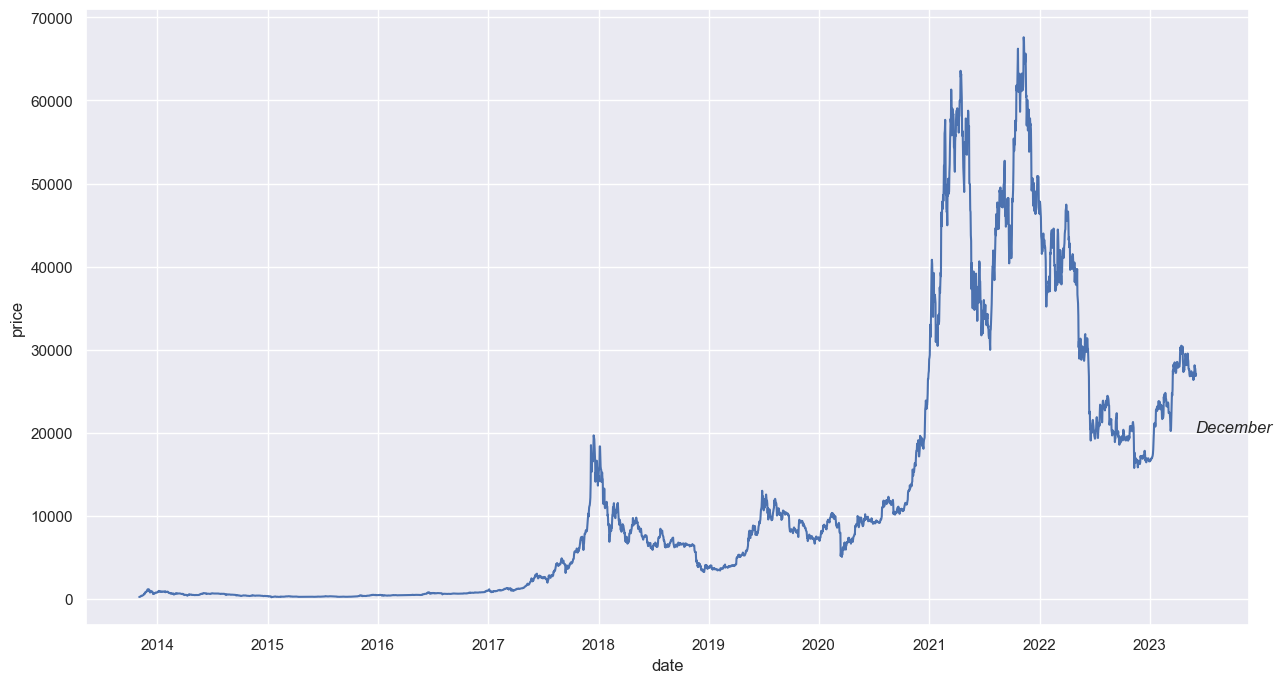

In [73]:
ax = sns.lineplot(x='date',y='price', data=btc_historical_prices)
ax.text(btc_historical_prices['date'].to_list()[-3], 20000, 'December', style='italic')


In [58]:
# Multiple lines on the same plot, very useful link here: 
# https://www.statology.org/seaborn-plot-multiple-lines/

In [59]:
btc_historical_prices.dtypes

date                   int64
price                float64
market_cap           float64
volume               float64
coin                  object
price_sma_7          float64
price_sma_30         float64
price_sma_90         float64
price_sma_180        float64
vol_sma_7            float64
vol_sma_30           float64
vol_sma_90           float64
vol_sma_180          float64
dev_price_sma_7      float64
dev_price_sma_30     float64
dev_price_sma_90     float64
dev_price_sma_180    float64
dev_vol_sma_7        float64
dev_vol_sma_30       float64
dev_vol_sma_90       float64
dev_vol_sma_180      float64
dtype: object

In [60]:
# IMP: I will need to make observations over bigger periods of time and/or different periods of time #

<Axes: >

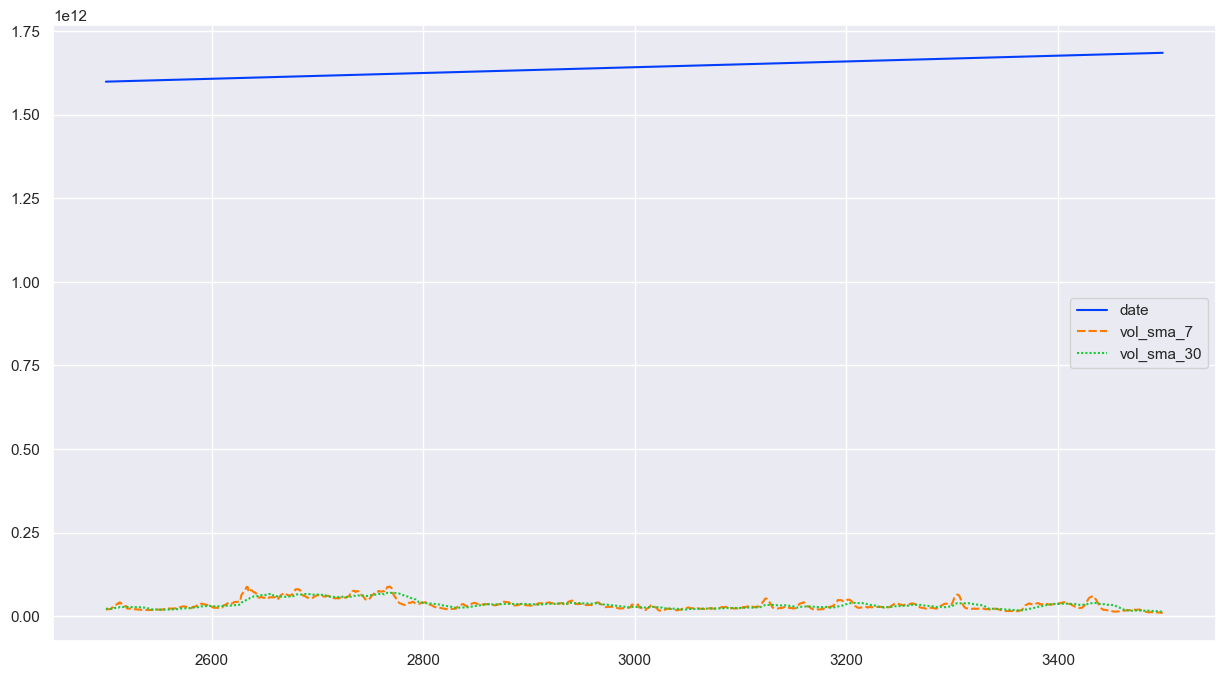

In [74]:
sns.lineplot(data=btc_historical_prices[['date','vol_sma_7','vol_sma_30']].tail(1000),palette='bright')

## Observations from the above and below charts
- Volume is MUCH more volatile than price 
- Since we are interested in higher time frame trades, it seems more useful to only look at SMAs as they smooth out the curve
- Deviation between 7-day and 30-day SMA of volumes seems to strongly predict whats going to happen
- Size of deviation seems to provide confidence/predict size of the move
- WHEN STUFF GOES UP, then 7-day vol moves significantly above 30-day vol and stays there, this is pretty strong and slightly predictive

- WHEN STUFF GOES DOWN, then 1. There is a large increase in 7-day vol compated to 30-day vol, followed by it going much lower the PRICE follows this pattern by a few days 


<Axes: >

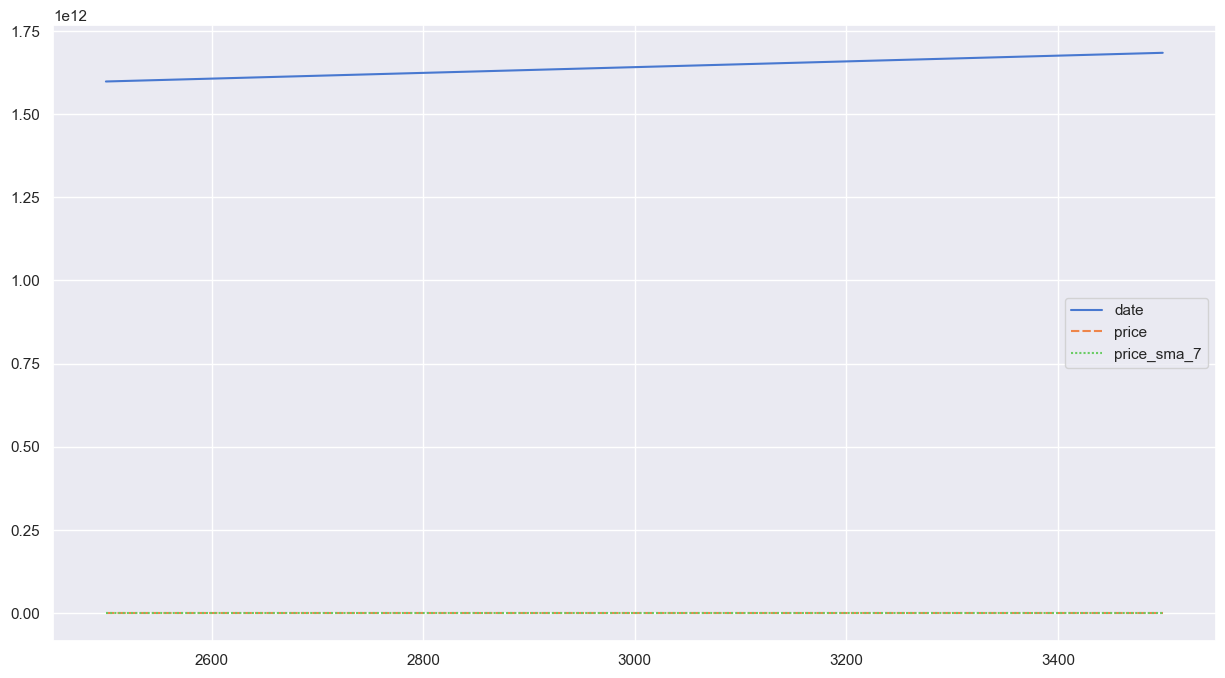

In [62]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_7']].tail(1000),palette='muted')

<Axes: >

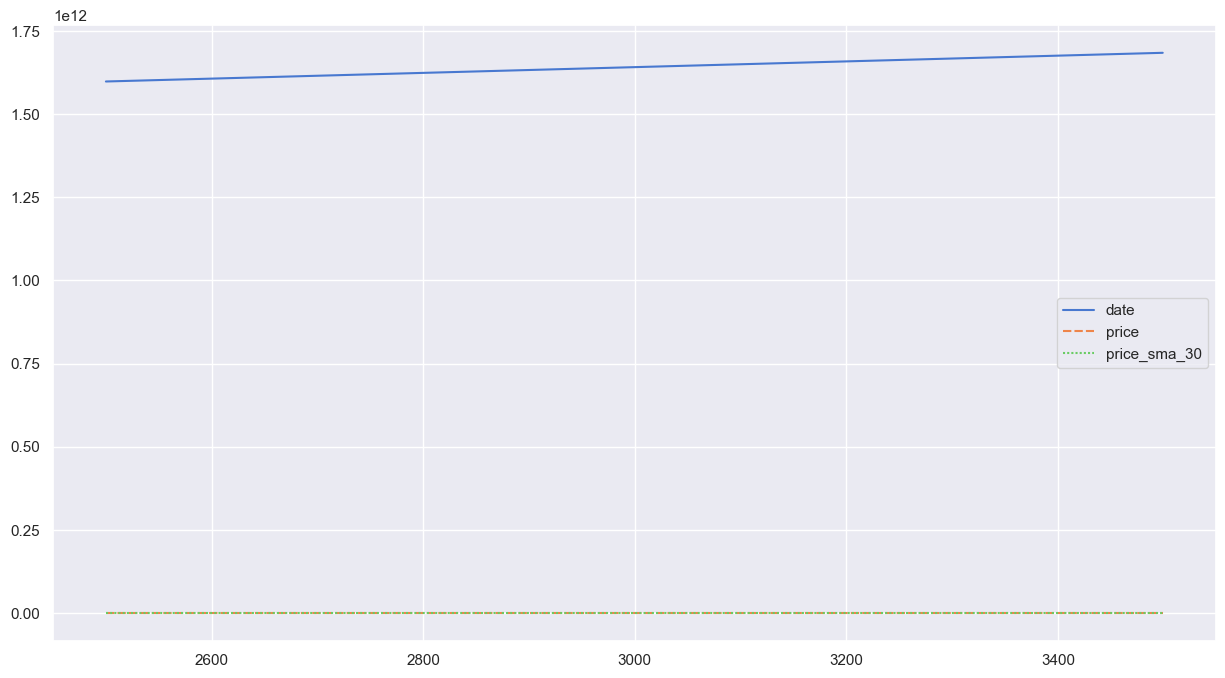

In [63]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),palette='muted')

<Axes: >

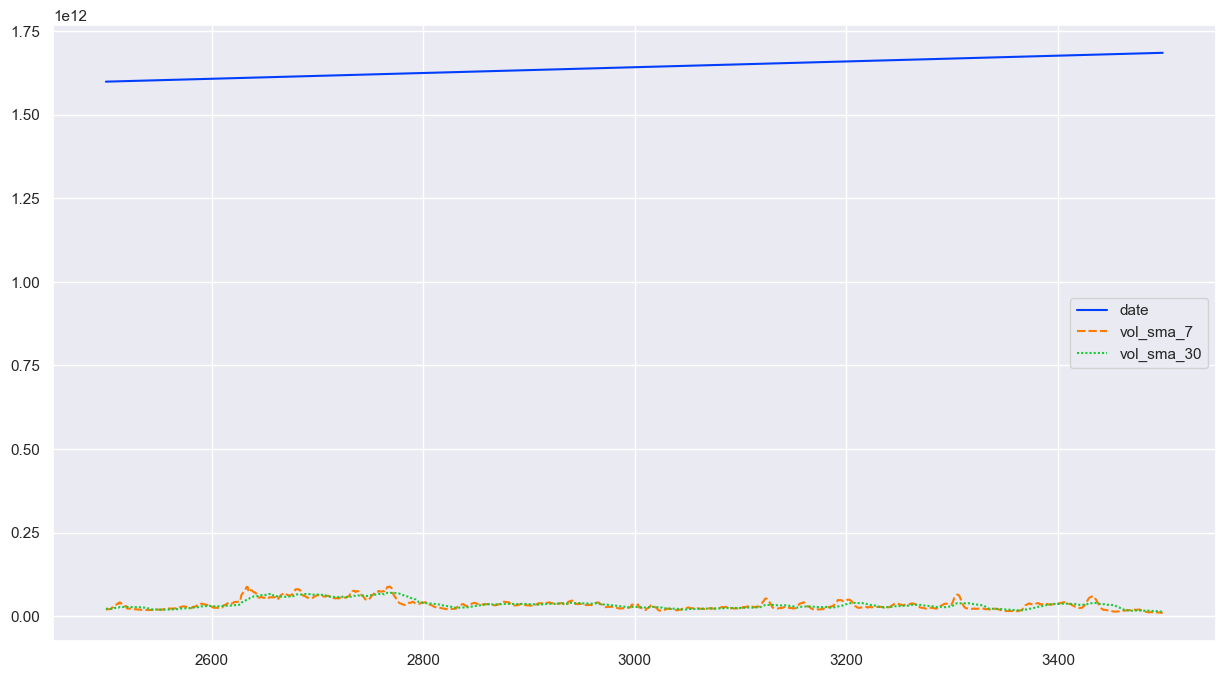

In [64]:
sns.lineplot(data=btc_historical_prices[['date','vol_sma_7','vol_sma_30']].tail(1000),palette='bright')

## Observations from above 2 and the below graphs 
- WHEN STUFF GOES UP then 30-day vol is significantly up than 7-day vol AND 7-day price is above 30-day price significantly too (say 10%)
- WHEN STUFF goes down then 30-day vol is significantly higher than 7-day and 7-day price is signficantly (Say 10%) lower than 30-day price


<Axes: >

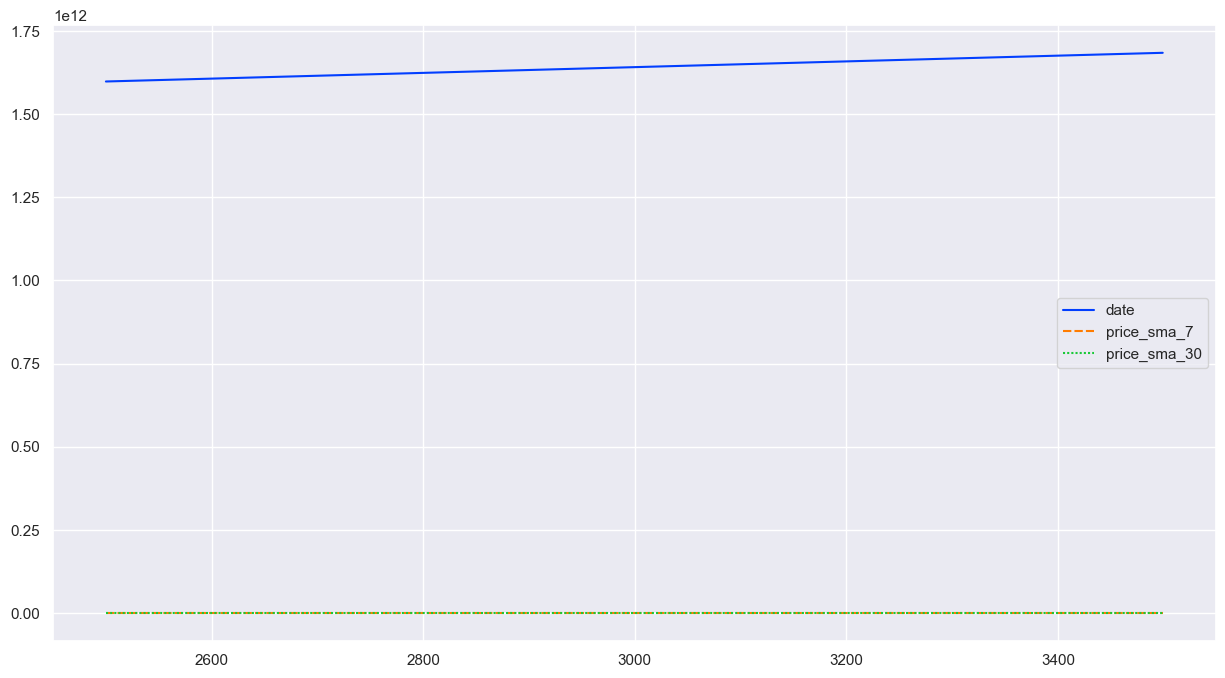

In [65]:


sns.lineplot(data=btc_historical_prices[['date','price_sma_7','price_sma_30']].tail(1000),palette='bright')


# A simple algorithm could be:

1. When 7-day vol is above a threshold (say 25%) than 30-day vol and 7-day price is above another threshold (say 10%) (i.e. trending up) then BUY 
2. When 7-day vol threshold is above another threshold (say 25%) above 30-day vol and 7-day price is below another thresold, say 10% (i.e.price is trending down) then SELL
3. 7-day vol going siginifcantly lower than 30-day will confirm the bearish trend
4. Similarly 7-day prices consistently staying above 30-days confirms the bull trend


### Some ideas
- shall i consider having diff between sma7 and sma 30 values? and perhaps use them as a feature in the model?
- shall i consider having volaitility/std dev to come up with the thresholds to detect a signal?

### Ideas on designing the algorithm

## Signal
1. One function should simply return whether we should buy or sell or do nothing on a given date
2. LATER I can add functionality that will help with sizing/confidence. Perhaps it will be best to keep asset allocation and risk management out of this piece, as that could be more global and this could just give us the signal, confidence level and perhaps an indication of size of the move

### Backtesting 
1. Perhaps I can just calculate the price on the day of entry and then at exit, and cal the % gain and use that as the metric to be optimised as well. Later I can think about making this much more sophisiticated I suppose, but in the beginning this shoudl suffice 

### Designing 
1. I must explore if there were ways of visualising the signals and deviations i.e. the workigns of the algo
2. I can try and do some initial adjustments to the thresholds and backtest and refine 
3. Once a basic and not very scary initial algo is made, I will move to actually executing trades and using the Kraken API to start doing so 
4. Later I will conitnue to work on making the basic algo more sophisticated, performant and better technically designed (e.g. running on a server, broken up into components, etc.)
5. I am first going to get a basic version working i.e. deploying actual money, before moving on to making it better

### Future
1. at some point, after the basic version is working, I will explore adding additional signals like coins moving onn/off exchange, signals from other coins, copy trading/wallet/blockhain analysis, tradfi signals, twitter sentiment, etc. to my algo 
2. Once I have had a few go s at teh algo my self, with raw thinking and Neha's help, then I will study existing materials and books to understand algo trading better 

## Designing the simple algorithm 
- this is for BTC at the moment, later I will add same thing for ETH as well 

### <font color='purple'> find out if I can visualise buy/sell signals on the chart </font>

In [66]:
# great link on finding no. of rows in a df
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
del(temp)
temp = [None]*len(btc_historical_prices.index)
temp

NameError: name 'temp' is not defined

In [67]:
# great link on generating a given no. of rand integers from a given sample 
# https://pynative.com/python-random-randrange/ 
for i in random.sample(range(0,3500),25):
    temp[i]='BUY'
    
for i in random.sample(range(0,3500),25):
    temp[i]='SELL'
    
temp


NameError: name 'temp' is not defined

In [68]:
len(btc_historical_prices.index)

3500

In [69]:
btc_historical_prices['temp_signal'] = temp


NameError: name 'temp' is not defined

In [70]:
# 2 neat ways of filtering on non-empty rows for a given column
#https://stackoverflow.com/questions/39475566/python-pandas-filter-out-records-with-null-or-empty-string-for-a-given-field 
btc_historical_prices[~btc_historical_prices.temp_signal.isnull()]

AttributeError: 'DataFrame' object has no attribute 'temp_signal'

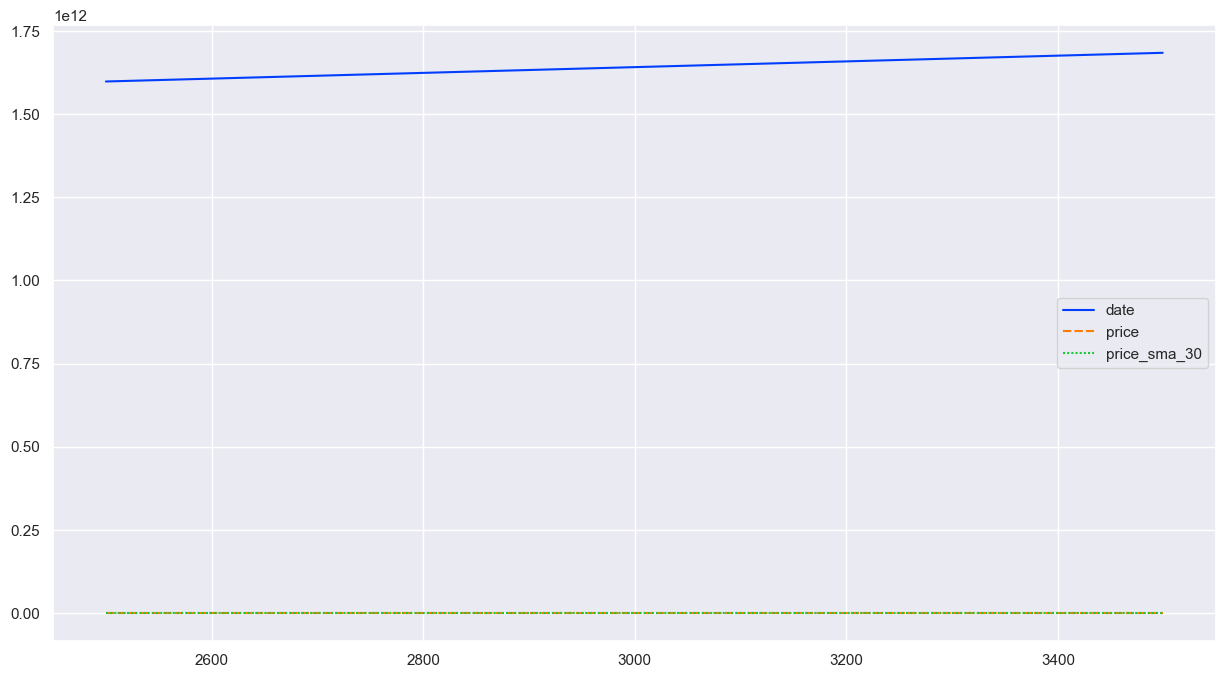

In [71]:
algo_plot = sns.lineplot(data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),palette='bright')

In [72]:
for (i,signal) in enumerate(btc_historical_prices.temp_signal):
    algo_plot.text(btc_historical_prices.date, btc_historical_prices.price, signal)

AttributeError: 'DataFrame' object has no attribute 'temp_signal'

In [73]:
plt.show()

In [ ]:
### find out if I can visualise the % deviations on the chart 

In [ ]:
### design a function along the lines of the algo that returns a buy/sell/do nothing on a given date

In [ ]:
### run the signal function for all dates in teh data set and store the results

In [ ]:
### visualise the buy/sell/do nothing signals on the graph 

In [ ]:
### backtest and calculate performance

In [ ]:
### Iterate a bit more as required 

In [ ]:
### connect with the Kraken API 

In [ ]:
### understand basic concepts of trading and using the Krakent API (see One note)

In [ ]:
### buy 10 USD bitcoin from code using Kraken API and confirm in the UX 

## OTHER explorations (not being used at the moment)

In [ ]:
#BUBBLE PLOT (OLD) ### OLDER Plot, not using currently ###
# from https://seaborn.pydata.org/examples/scatter_bubbles.html
##sns.relplot(x='date',y='volume',hue='coin',size='price',palette='muted',height=12, data=btc_eth_historical_prices)

In [ ]:
# filtering only on btc data source: https://towardsdatascience.com/8-ways-to-filter-pandas-dataframes-d34ba585c1b8 
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='btc'])

In [ ]:
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='eth'])

In [ ]:
# make a wide array like before and do some ratios and plotting on 2 axes adn stuff like that 

In [ ]:
# plotting with 2 different vertical axes

In [ ]:
ax=btc_eth_historical_prices.plot(x="date",y="price")

In [ ]:
# generic function to fetch historical crypto prices into a data frame 

In [ ]:
# fetch the list of cryptos i am interested in

In [ ]:
# loop through the cryptos, fetch the prices, and aggregate in a dataframe

In [ ]:
# plot them all together 

In [ ]:
# grab an element in each row, put the date from the first one in a new dataframe, 
# and grab the price from the list, convert it to float, do the same for mcap and volume, build a row and append to 
# new dataframe 

### Volume trends for top 10 crypto over last 3 months 
**Plot a graph showing line charts of top 10 crypto currencies by trading volume for each day** 
1. Grab a set of cryptos that were in teh top 10 traded in the last 3 months at any time 
2. Plot their volume traded daily 
3. Let the size of the circle represent price of the asset (we will see if this is possible )

### PLAYING AROUND WITH GRAPHING (NEHAS CODE TO BE USED AS A BASE FOR FURTHER EXPLORATION)

In [ ]:
top_crypto_vol.plot.bar(x='symbol', y='market_cap')

In [ ]:
top_crypto_vol.plot.scatter(x='current_price', y='market_cap')

In [ ]:
top_crypto_vol.plot.line(x='current_price', y='market_cap')

## Playing around with some interesting API features

### some of these would be signals for my trading algo 

### Trending on coingecko

In [ ]:
cg.get_search_trending()

### Exchange volumes

In [ ]:
cg.get_exchanges_list()

In [ ]:
cg.get_exchanges_by_id(id="binance")

### Defi 

In [ ]:
cg.get_global_decentralized_finance_defi()

### Public companies holding crypto (known)

In [ ]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "ethereum")

In [ ]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "bitcoin")